## Import  libraries

In [8]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt

In [9]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

## Load the data

In [23]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Checking the number of unique classes 
print('Training classes : ', np.unique(y_train))
print('Testing classes : ', np.unique(y_test))

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Training classes :  [0 1 2 3 4 5 6 7 8 9]
Testing classes :  [0 1 2 3 4 5 6 7 8 9]


### Display randomly selected images from dataset...

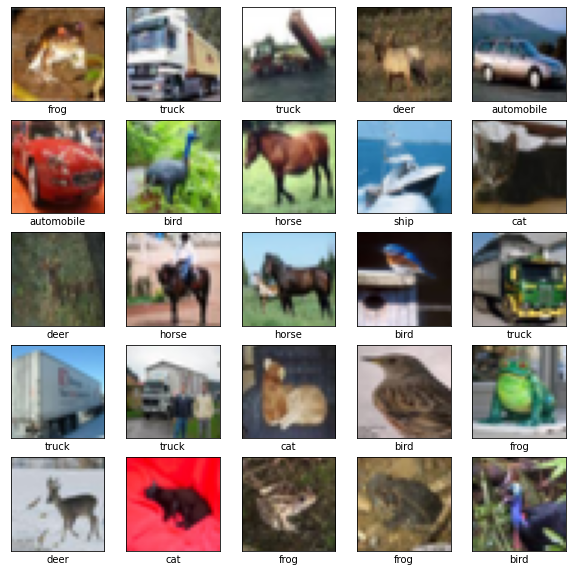

In [24]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i][0]])

plt.show()

### Sample normalization

In [27]:
# Converting the pixels data to float type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
x_train = x_train / 255
x_test = x_test / 255 

### One-hot-encoding

In [25]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[:5,:])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Create the model

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# show the model summary....
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

##  Compile the model

In [28]:
from keras import optimizers
opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [31]:
epochs = 5

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(x_test, y_test))



Epoch 1/5
1563/1563 [==============================] - 55s 35ms/step - loss: 2.3039 - accuracy: 0.1004 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 64s 41ms/step - loss: 2.3034 - accuracy: 0.0987 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 69s 44ms/step - loss: 2.3034 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 68s 44ms/step - loss: 2.3034 - accuracy: 0.0987 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 68s 44ms/step - loss: 2.3034 - accuracy: 0.0999 - val_loss: 2.3031 - val_accuracy: 0.1000


In [33]:
model.metrics_names

['loss', 'accuracy']

### Evaluate the model...

In [34]:
score = model.evaluate(x_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 2.303069829940796
Test accuracy: 0.10000000149011612


### Create a better model...

In [37]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Creating a sequential model and adding layers to it

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)       

In [39]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [40]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 106s 135ms/step - loss: 1.8221 - accuracy: 0.3767 - val_loss: 2.2304 - val_accuracy: 0.3383
Epoch 2/5
782/782 [==============================] - 104s 133ms/step - loss: 1.2602 - accuracy: 0.5487 - val_loss: 1.1550 - val_accuracy: 0.5972
Epoch 3/5
782/782 [==============================] - 107s 137ms/step - loss: 1.0379 - accuracy: 0.6318 - val_loss: 0.9408 - val_accuracy: 0.6608
Epoch 4/5
782/782 [==============================] - 112s 143ms/step - loss: 0.9126 - accuracy: 0.6805 - val_loss: 1.2642 - val_accuracy: 0.5823
Epoch 5/5
782/782 [==============================] - 118s 151ms/step - loss: 0.8464 - accuracy: 0.7044 - val_loss: 0.7552 - val_accuracy: 0.7311


### Evaluate the second model..

In [41]:
score = model.evaluate(x_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.7551895976066589
Test accuracy: 0.7311000227928162
